In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#lendo o arquivo com o delimitador ;
df_2016 = pd.read_csv("Fluxo Escolar 2016.csv", encoding='latin1', delimiter=';')

In [ ]:
print(df_2016.columns)

Index(['ANO_LETIVO', 'NM_DIRETORIA', 'NM_MUNICIPIO', 'CD_REDE_ENSINO', 'APR_1',
       'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2', 'APR_3', 'REP_3', 'ABA_3'],
      dtype='object')


In [ ]:
# Substituir vírgulas por pontos nas colunas numéricas e converter para float
colunas_numericas = ['CD_REDE_ENSINO','APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2', 'APR_3', 'REP_3', 'ABA_3']
for coluna in colunas_numericas:
    df_2016[coluna] = df_2016[coluna].astype(str).str.replace(',', '.').astype(float)

In [ ]:
# Agrupar e calcular a média das taxas de abandono por diretoria
abandono_por_diretoria_2016= df_2016.groupby('NM_DIRETORIA')[['ABA_3']].mean()

In [ ]:
# Ordenar do maior para o menor
abandono_por_diretoria_2016 = abandono_por_diretoria_2016.sort_values(by='ABA_3', ascending=False)

In [ ]:
# Exibir os resultados
print(abandono_por_diretoria_2016)

                    ABA_3
NM_DIRETORIA             
OURINHOS         8.553333
MOGI DAS CRUZES  7.770000
LESTE 3          7.730000
CARAPICUIBA      6.735000
GUARULHOS NORTE  6.130000
...                   ...
TAQUARITINGA     0.994545
CAMPINAS LESTE   0.945000
ITAPEVA          0.745000
CARAGUATATUBA    0.365000
JALES            0.332000

[91 rows x 1 columns]


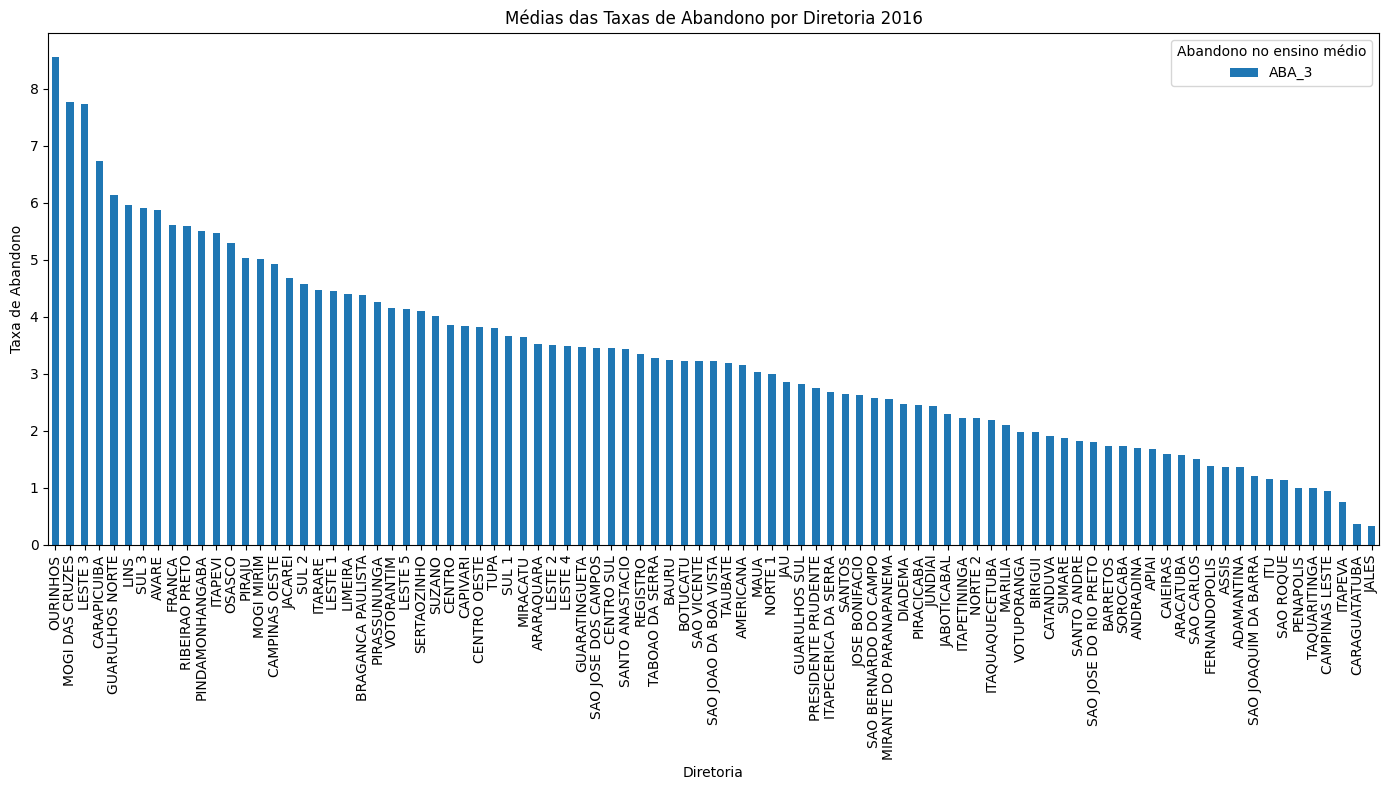

In [ ]:
# Plotando as taxas de abandono por diretoria
abandono_por_diretoria_2016.plot(kind='bar', figsize=(14,8))
plt.title('Médias das Taxas de Abandono por Diretoria 2016')
plt.ylabel('Taxa de Abandono')
plt.xlabel('Diretoria')
plt.xticks(rotation=90)  # Rotacionar os nomes das diretorias
plt.legend(title='Abandono no ensino médio')
plt.tight_layout()
plt.show()

In [ ]:
mesorregioes = {
    # Mesorregiao Aracatuba
    'ADAMANTINA': 'ARACATUBA',
    'ANDRADINA': 'ARACATUBA',
    'ARACATUBA': 'ARACATUBA',
    'BIRIGUI': 'ARACATUBA',
    'PENAPOLIS': 'ARACATUBA',

    # Mesorregiao Araraquara
    'ARARAQUARA': 'ARARAQUARA',
    'SAO CARLOS': 'ARARAQUARA',
    'JABOTICABAL': 'ARARAQUARA',
    'SAO JOAO DA BOA VISTA': 'ARARAQUARA',

    # Mesorregiao Assis
    'ASSIS': 'ASSIS',
    'TUPA': 'ASSIS',
    'OURINHOS': 'ASSIS',

    # Mesorregiao Bauru
    'BAURU': 'BAURU',
    'LINS': 'BAURU',
    'JAU': 'BAURU',
    'BOTUCATU': 'BAURU',

    # Mesorregiao Campinas
    'CAMPINAS LESTE': 'CAMPINAS',
    'CAMPINAS OESTE': 'CAMPINAS',
    'SUMARE': 'CAMPINAS',
    'JUNDIAI': 'CAMPINAS',
    'BRAGANCA PAULISTA': 'CAMPINAS',
    'CAIEIRAS': 'CAMPINAS',

    # Mesorregiao Itapetininga
    'ITAPETININGA': 'ITAPETININGA',
    'SOROCABA': 'ITAPETININGA',
    'ITARARE': 'ITAPETININGA',
    'ITU': 'ITAPETININGA',
    'SAO ROQUE': 'ITAPETININGA',
    'APIAI': 'ITAPETININGA',
    'AVARE': 'ITAPETININGA',
    'PIRAJU': 'ITAPETININGA',
    'ITAPEVA': 'ITAPETININGA',
    'VOTORANTIM': 'ITAPETININGA',

    # Mesorregiao Litoral Sul Paulista
    'SANTOS': 'LITORAL SUL PAULISTA',
    'SAO VICENTE': 'LITORAL SUL PAULISTA',
    'MIRACATU': 'LITORAL SUL PAULISTA',
    'REGISTRO': 'LITORAL SUL PAULISTA',

    # Mesorregiao Marilia
    'MARILIA': 'MARILIA',
    'PRESIDENTE PRUDENTE': 'MARILIA',
    'MIRANTE DO PARANAPANEMA': 'MARILIA',
    'SANTO ANASTACIO': 'MARILIA',

    # Mesorregiao Metropolitana de Sao Paulo
    'AMERICANA': 'METROPOLITANA DE SAO PAULO',
    'DIADEMA': 'METROPOLITANA DE SAO PAULO',
    'GUARULHOS NORTE': 'METROPOLITANA DE SAO PAULO',
    'SANTO ANDRE': 'METROPOLITANA DE SAO PAULO',
    'OSASCO': 'METROPOLITANA DE SAO PAULO',
    'CARAPICUIBA': 'METROPOLITANA DE SAO PAULO',
    'ITAPECERICA DA SERRA': 'METROPOLITANA DE SAO PAULO',
    'ITAPEVI': 'METROPOLITANA DE SAO PAULO',
    'ITAQUAQUECETUBA': 'METROPOLITANA DE SAO PAULO',
    'MAUA': 'METROPOLITANA DE SAO PAULO',
    'SUZANO': 'METROPOLITANA DE SAO PAULO',
    'TABOAO DA SERRA': 'METROPOLITANA DE SAO PAULO',
    'NORTE 1': 'METROPOLITANA DE SAO PAULO',
    'SAO BERNARDO DO CAMPO': 'METROPOLITANA DE SAO PAULO',
    'CENTRO': 'METROPOLITANA DE SAO PAULO',
    'CENTRO OESTE': 'METROPOLITANA DE SAO PAULO',
    'CENTRO SUL': 'METROPOLITANA DE SAO PAULO',
    'GUARULHOS SUL': 'METROPOLITANA DE SAO PAULO',
    'LESTE 1': 'METROPOLITANA DE SAO PAULO',
    'LESTE 2': 'METROPOLITANA DE SAO PAULO',
    'LESTE 3': 'METROPOLITANA DE SAO PAULO',
    'LESTE 4': 'METROPOLITANA DE SAO PAULO',
    'LESTE 5': 'METROPOLITANA DE SAO PAULO',
    'NORTE 2': 'METROPOLITANA DE SAO PAULO',
    'SUL 1': 'METROPOLITANA DE SAO PAULO',
    'SUL 2': 'METROPOLITANA DE SAO PAULO',
    'SUL 3': 'METROPOLITANA DE SAO PAULO',

    # Mesorregiao Piracicaba
    'PIRACICABA': 'PIRACICABA',
    'LIMEIRA': 'PIRACICABA',
    'CAPIVARI': 'PIRACICABA',
    'PIRASSUNUNGA': 'PIRACICABA',

    # Mesorregiao Ribeirao Preto
    'RIBEIRAO PRETO': 'RIBEIRAO PRETO',
    'SERTAOZINHO': 'RIBEIRAO PRETO',
    'FRANCA': 'RIBEIRAO PRETO',

    # Mesorregiao Sao Jose do Rio Preto
    'SAO JOSE DO RIO PRETO': 'SAO JOSE DO RIO PRETO',
    'FERNANDOPOLIS': 'SAO JOSE DO RIO PRETO',
    'VOTUPORANGA': 'SAO JOSE DO RIO PRETO',
    'JALES': 'SAO JOSE DO RIO PRETO',
    'JOSE BONIFACIO': 'SAO JOSE DO RIO PRETO',
    'BARRETOS': 'SAO JOSE DO RIO PRETO',
    'CATANDUVA': 'SAO JOSE DO RIO PRETO',
    'SAO JOAQUIM DA BARRA': 'SAO JOSE DO RIO PRETO',
    'TAQUARITINGA': 'SAO JOSE DO RIO PRETO',

    # Mesorregiao Vale do Paraiba Paulista
    'SAO JOSE DOS CAMPOS': 'VALE DO PARAIBA PAULISTA',
    'GUARATINGUETA': 'VALE DO PARAIBA PAULISTA',
    'TAUBATE': 'VALE DO PARAIBA PAULISTA',
    'JACAREI': 'VALE DO PARAIBA PAULISTA',
    'PINDAMONHANGABA': 'VALE DO PARAIBA PAULISTA',
    'MOGI DAS CRUZES': 'VALE DO PARAIBA PAULISTA',
    'MOGI MIRIM': 'VALE DO PARAIBA PAULISTA',
    'CARAGUATATUBA': 'VALE DO PARAIBA PAULISTA',
}

In [ ]:
# Criar uma coluna para mesorregião com base na diretoria
df_2016['MESORREGIAO'] = df_2016['NM_DIRETORIA'].map(mesorregioes)

In [ ]:
print(df_2016.columns)

Index(['ANO_LETIVO', 'NM_DIRETORIA', 'NM_MUNICIPIO', 'CD_REDE_ENSINO', 'APR_1',
       'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2', 'APR_3', 'REP_3', 'ABA_3',
       'MESORREGIAO'],
      dtype='object')


In [ ]:
# Agrupar e calcular a média das taxas de abandono por mesorregião
abandono_por_mesorregiao = df_2016.groupby('MESORREGIAO')[['ABA_3']].mean()

In [ ]:
# Verificar se existem valores nulos na coluna 'Mesorregiao'
print(df_2016['MESORREGIAO'].isnull().sum())

# Mostrar as diretorias que não foram mapeadas corretamente
diretorias_nao_mapeadas = df_2016[df_2016['MESORREGIAO'].isnull()]['NM_DIRETORIA'].unique()
print("Diretorias não mapeadas:", diretorias_nao_mapeadas)


0
Diretorias não mapeadas: []


In [ ]:
df_2016.to_csv('Fluxo Escolar 2016_atualizado.csv', index=False)

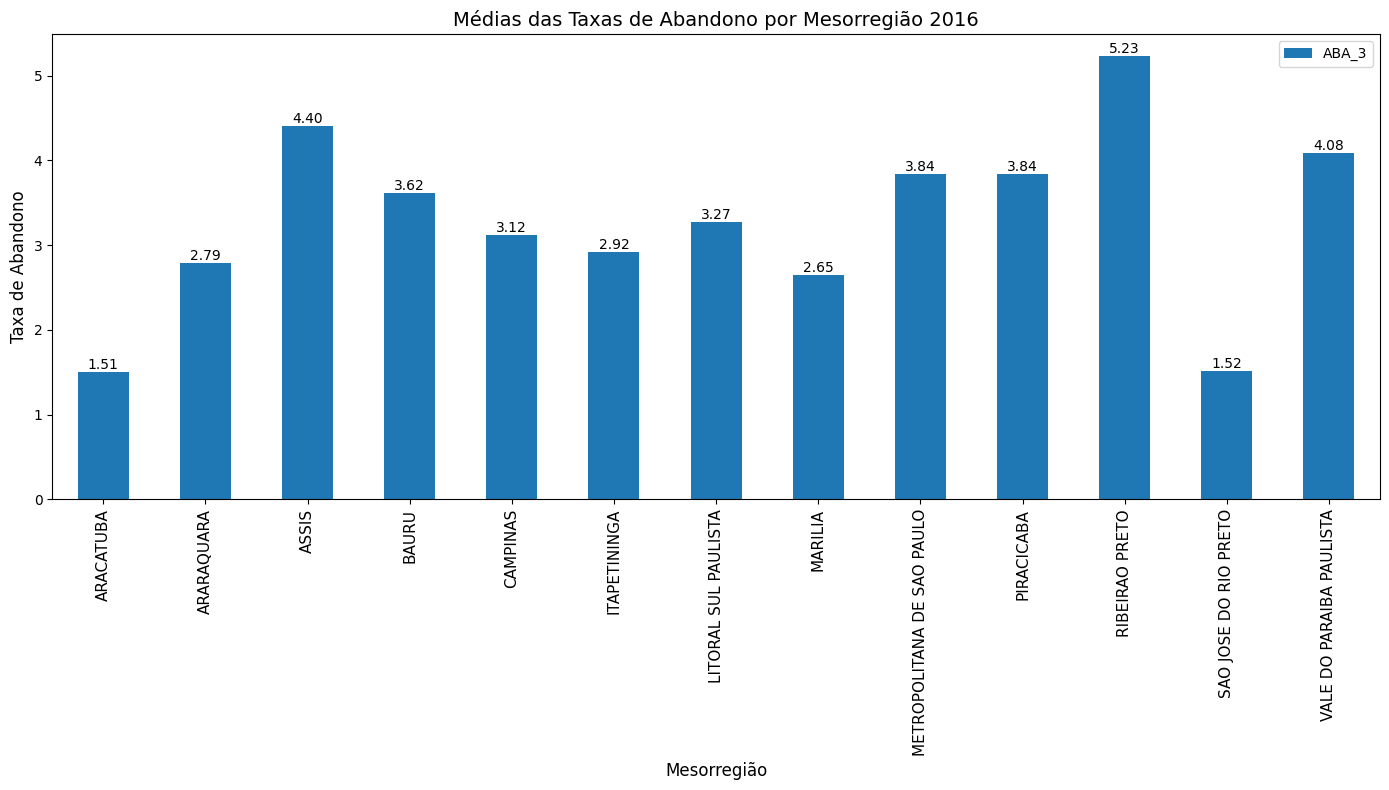

In [ ]:
# Plotando as taxas de abandono por mesorregião
ax = abandono_por_mesorregiao.plot(kind='bar', figsize=(14,8))

# Adicionar Rótulo de Valor
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%.2f')

plt.title('Médias das Taxas de Abandono por Mesorregião 2016', fontsize=14)
plt.ylabel('Taxa de Abandono', fontsize=12)
plt.xlabel('Mesorregião', fontsize=12)
plt.xticks(rotation=90, fontsize=11)
plt.tight_layout()
plt.show()
